In [1]:
import numpy as np
import healpy as hp
from rubin_sim.scheduler.surveys import generate_dd_surveys, Deep_drilling_survey
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.utils import _hpid2RaDec, _angularSeparation
import rubin_sim.maf as maf

In [2]:
ddf_surveys = generate_dd_surveys()
#ddf_surveys = [ddf for ddf in ddf_surveys if ddf.survey_name != "DD:EDFS"]
# Add on the Euclid field as one



#ddf_surveys.append(
#    Deep_drilling_survey([], 58.97, -49.28, survey_name="DD:EDFSa")
#)
#ddf_surveys.append(
#    Deep_drilling_survey([], 63.6, -47.60, survey_name="DD:EDFSb")
#)

In [3]:
nside = 512
ra,dec = _hpid2RaDec(nside, np.arange(hp.nside2npix(nside)))

In [6]:
bundle_list = []
sql = ''
radius = np.radians(4.)

plotFuncs = [maf.HealpixSkyMap()]

summary_stats = [maf.MeanMetric(), maf.MedianMetric()]

for ddf in ddf_surveys:
    label = ddf.survey_name.replace('DD:', '')
    plotDict = {'visufunc': hp.gnomview,
               'rot': (np.degrees(np.mean(ddf.ra)), np.degrees(np.mean(ddf.dec)), 0),
               'xsize': 500}
    dist = _angularSeparation(ra, dec, np.mean(ddf.ra), np.mean(ddf.dec))
    good = np.where(dist <= radius)[0]
    slicer = maf.HealpixSubsetSlicer(nside, good)
    metric = maf.metrics.SNNSNMetric(verbose=False, metricName='%s, SNe' % label)
    bundle_list.append(maf.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs))
    
    for filtername in 'ugrizy':
        metric = maf.Coaddm5Metric(metricName='%s, 5-sigma %s' % (label, filtername))
        sql = 'filter="%s"' % filtername
        bundle_list.append(maf.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs))

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes


Querying table None with no constraint for columns ['filter', 'observationStartMJD', 'observationId', 'fiveSigmaDepth', 'night', 'rotSkyPos', 'visitExposureTime', 'visitTime', 'numExposures', 'fieldDec', 'fieldRA'].
Found 2081749 visits
Running:  ['opsim_ELAISS1_SNe_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter="y" for columns ['filter', 'observationStartMJD', 'observationId', 'fiveSigmaDepth', 'rotSkyPos', 'night', 'visitExposureTime', 'visitTime', 'numExposures', 'fieldDec', 'fieldRA']
Found 390128 visits
Running:  ['opsim_ELAISS1_5-sigma_y_y_HEAL']
Completed metric generation.
Running:  ['opsim_XMM-LSS_SNe_y_HEAL', 'opsim_XMM-LSS_5-sigma_y_y_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/baseSpatialSlicer.py:118: UserWarning: Warning:  Loading maps but cache on.Should probably set useCache=False in slicer.
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 16 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running:  ['opsim_ECDFS_SNe_y_HEAL', 'opsim_ECDFS_5-sigma_y_y_HEAL']
Completed metric generation.
Running:  ['opsim_COSMOS_SNe_y_HEAL', 'opsim_COSMOS_5-sigma_y_y_HEAL']
Completed metric generation.
Running:  ['opsim_EDFS_SNe_y_HEAL', 'opsim_EDFS_5-sigma_y_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter="g" for columns ['fieldDec', 'fieldRA', 'rotSkyPos', 'fiveSigmaDepth']
Found 214824 visits
Running:  ['opsim_ELAISS1_5-sigma_g_g_HEAL']
Completed metric generation.
Running:  ['opsim_XMM-LSS_5-sigma_g_g_HEAL']
Completed metric generation.
Running:  ['opsim_ECDFS_5-sigma_g_g_HEAL']
Completed metric generation.
Running:  ['opsim_COSMOS_5-sigma_g_g_HEAL']
Completed metric generation.
Running:  ['opsim_EDFS_5-sigma_g_g_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter="i" for co

/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="y"" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:583: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/metricBundles/metricBundleGroup

Plotting complete.
Plotting figures with "filter="g"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/spatialPlotters.py:186: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(fignum, figsize=plotDict["figsize"])
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="i"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="r"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="u"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.
Plotting figures with "filter="z"" constraint now.


81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066
81.24756453813393 98.75243546186607 -8.752435461866066 8.752435461866066


Plotting complete.


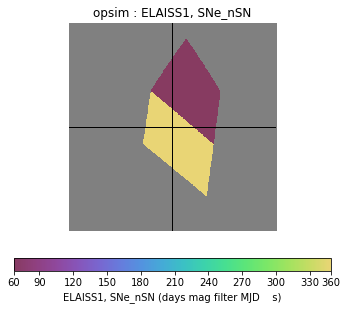

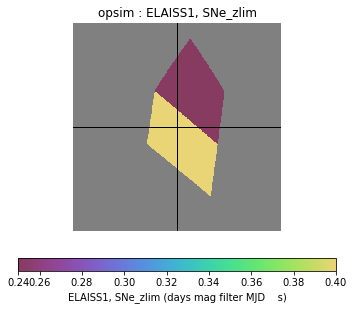

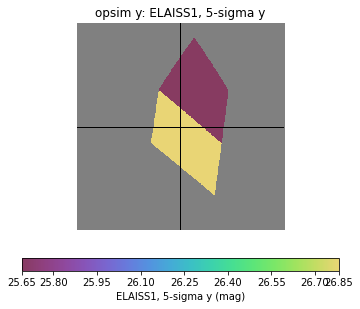

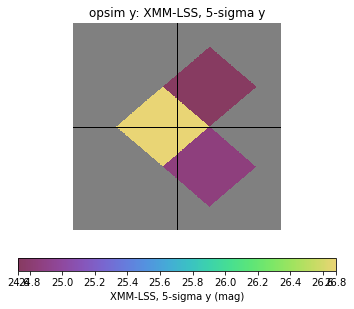

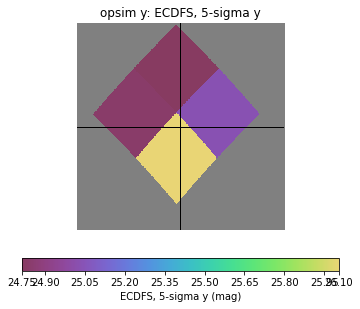

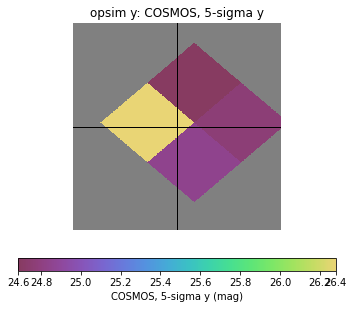

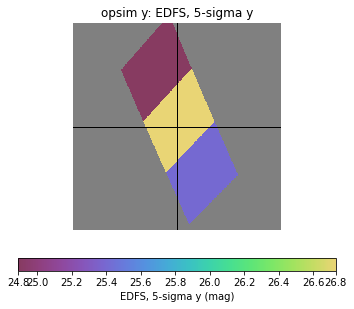

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

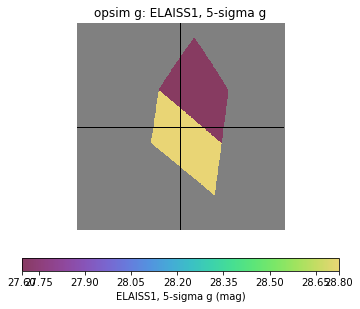

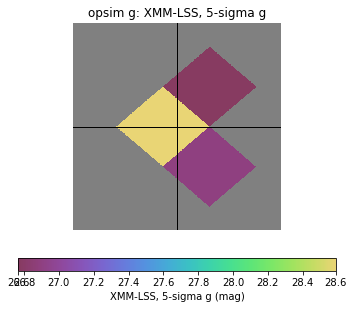

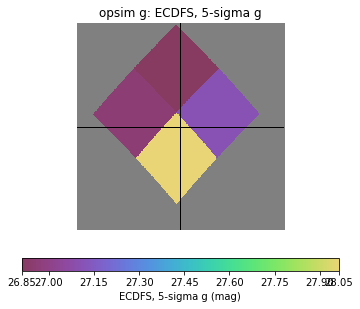

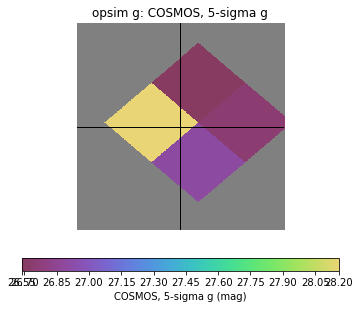

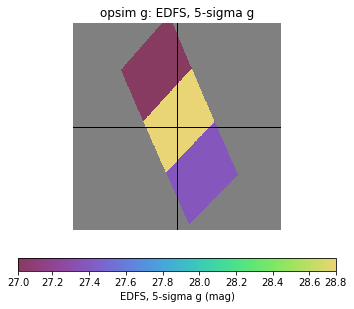

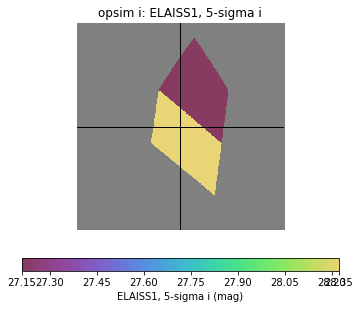

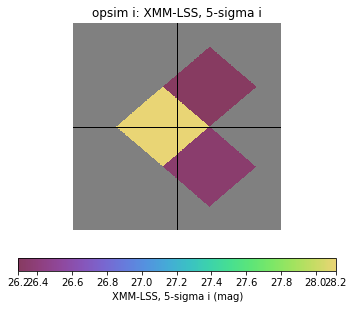

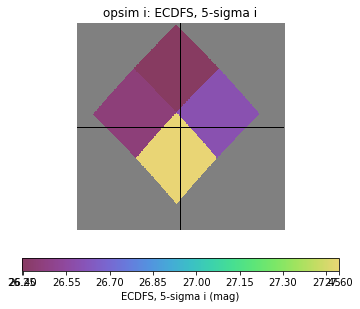

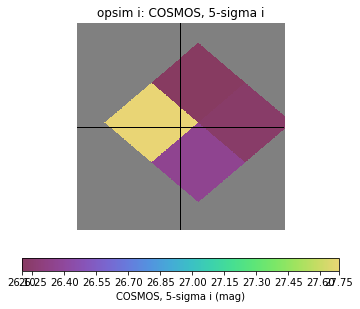

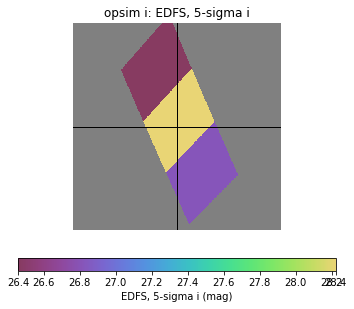

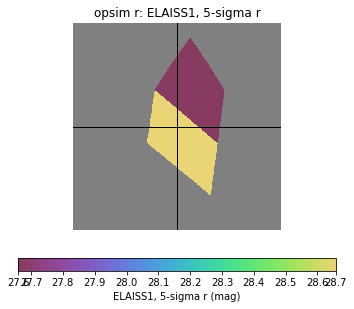

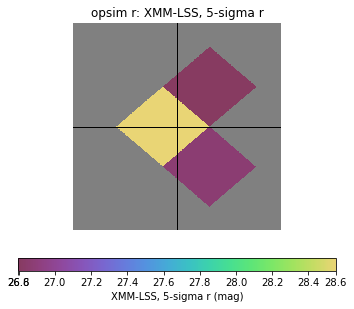

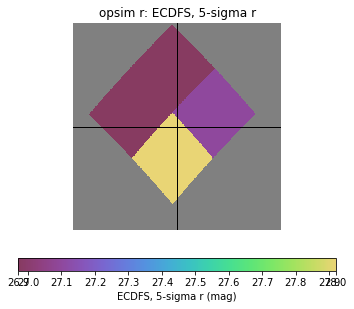

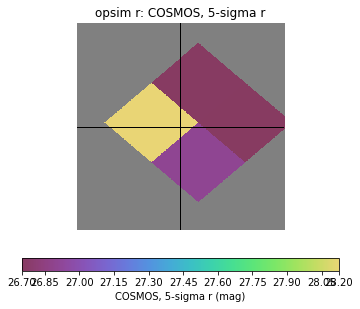

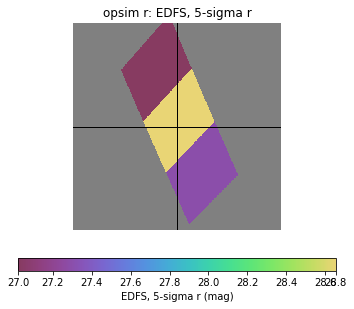

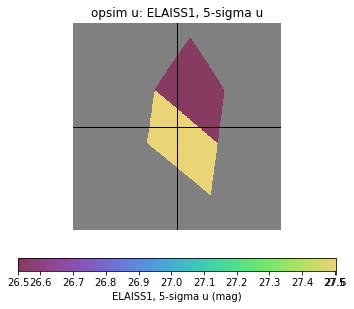

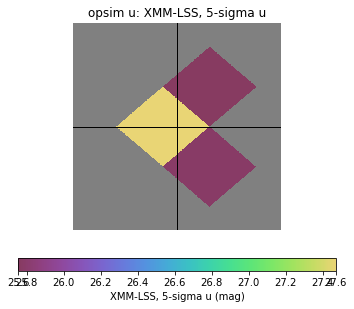

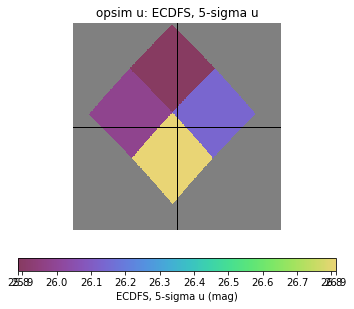

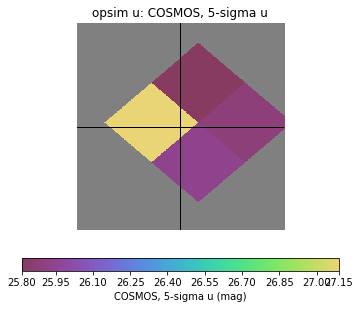

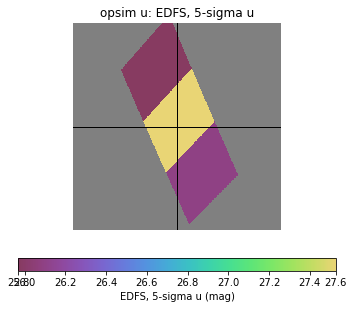

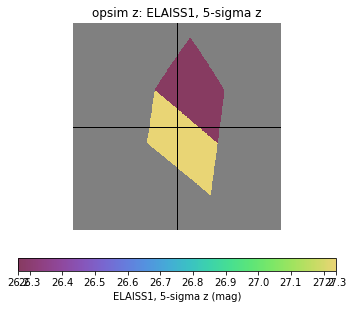

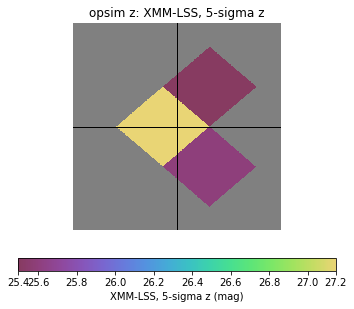

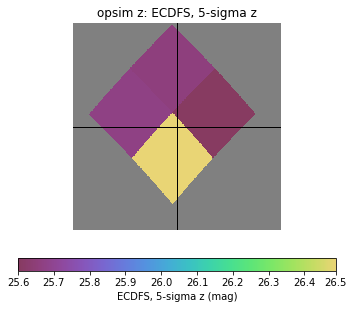

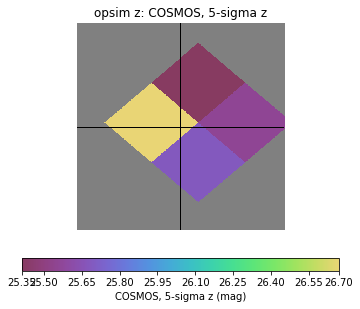

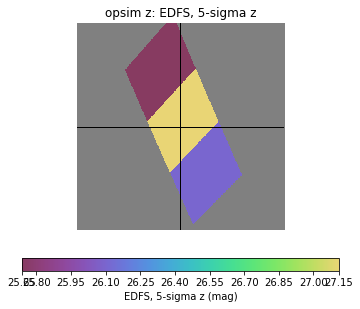

In [7]:
outDir = "temp"
resultsDb = maf.db.ResultsDb(outDir=outDir)

bd = maf.metricBundles.makeBundlesDictFromList(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, 'baseline_v2.1_10yrs.db', outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [ ]:


hp.gnomview(bd['ELAISS1, SNe_nSN'].metricValues, rot=(10,-45,0), xsize=500)